In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# abrindo as planilhas
df1 = pd.read_excel('datasets/Aracaju.xlsx')
df2 = pd.read_excel('datasets/Fortaleza.xlsx')
df3 = pd.read_excel('datasets/Natal.xlsx')
df4 = pd.read_excel('datasets/Recife.xlsx')
df5 = pd.read_excel('datasets/Salvador.xlsx')

In [5]:
#juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5],)

In [7]:
#exibindo as cinco últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
#exibindo uma amostra do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
129,Recife,2019-03-02,35.34,982,7
148,Natal,2019-01-02,40.59,1037,3
107,Natal,2019-01-02,14.70,1035,1
226,Salvador,2019-01-02,38.32,1035,2
128,Recife,2019-03-02,38.70,982,4


In [6]:
#exibindo as cinco primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [16]:
#exibindo os tipos de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [19]:
#trocando o tipo de dado de uma coluna
df['LojaID'] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [21]:
#verificando se há valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [22]:
#criando a coluna de Receita (formada a partir da coluna vendas multiplicada pela coluna Qtde)
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [23]:
# achando a quantidade de produtos vendidos (em caso de não ter essa coluna)
df['Receita/Vendas'] = df['Receita'] / df['Vendas']
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [25]:
#maior receita
df['Receita'].max()

3544.0

In [26]:
#menor receita
df['Receita'].min()

3.34

In [27]:
# retornando os maiores valores (quantididade de valores a definir) com base em uma coluna específica
#nlargest
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [28]:
# retornando os menores valores (quantidade de valores a definir) com base em uma coluna específica
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [29]:
#retornando a soma da receita de cada cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [33]:
#ordenando a coluna
df.sort_values('Receita', ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0


In [36]:
'********************************************************** AULA 5*********************************************'

'********************************************************** AULA 5*********************************************'

In [38]:
#transformando a coluna data de datetime para int
df['Data'] = df['Data'].astype('int64')
df['Data'].dtypes

dtype('int64')

In [41]:
#transformando a coluna data de int para datetime novamente
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [42]:
# somatório da receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
#criando uma nova coluna com o ano
df['Ano_venda'] = df['Data'].dt.year

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda
165,Salvador,2019-01-02,11.54,1037,1,11.54,1.0,2019
238,Natal,2019-01-03,139.64,1035,1,139.64,1.0,2019
131,Natal,2019-01-02,63.48,1037,3,190.44,3.0,2019
16,Salvador,2019-01-01,32.47,1036,2,64.94,2.0,2019
70,Aracaju,2018-01-01,8.44,1523,9,75.96,9.0,2018


In [45]:
# extraindo mês e dia
df['Mês_venda'], df['Dia_venda'] = df['Data'].dt.month, df['Data'].dt.day

In [49]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda
61,Recife,2019-01-01,127.85,982,7,894.95,7.0,2019,1,1
108,Natal,2019-01-02,11.72,1037,1,11.72,1.0,2019,1,2
38,Salvador,2019-01-01,165.34,1034,3,496.02,3.0,2019,1,1
127,Fortaleza,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2


In [50]:
#retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [51]:
#calculando a diferença de dias (do dia 1 até o dia da coluna 'dias')
df['diferença_dias'] = df['Data'] - df['Data'].min()

In [52]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda,diferença_dias
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days
104,Aracaju,2018-01-01,46.96,1522,1,46.96,1.0,2018,1,1,0 days
23,Recife,2019-01-01,37.51,982,2,75.02,2.0,2019,1,1,365 days
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,1.0,2019,1,1,365 days
45,Salvador,2019-01-01,175.25,1035,3,525.75,3.0,2019,1,1,365 days


In [53]:
#criando a coluna de trimestre
df['trimeste_venda'] = df['Data'].dt.quarter

In [57]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda,diferença_dias,trimeste_venda
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,5.0,2019,1,1,365 days,1
93,Aracaju,2018-01-01,188.70,1523,1,188.70,1.0,2018,1,1,0 days,1
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,6.0,2019,1,1,365 days,1
47,Recife,2019-01-01,8.60,983,3,25.80,3.0,2019,1,1,365 days,1
16,Natal,2018-07-01,298.00,854,3,894.00,3.0,2018,7,1,181 days,3


In [61]:
# listando as vendas do mês de março de 2019
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [65]:
vendas_marco_2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_venda,Mês_venda,Dia_venda,diferença_dias,trimeste_venda
50,Natal,2019-03-08,324.00,854,4,1296.00,4.0,2019,3,8,431 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,4.0,2019,3,27,450 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,3.0,2019,3,2,425 days,1
133,Salvador,2019-03-02,153.71,1035,1,153.71,1.0,2019,3,2,425 days,1


In [66]:
'---------------------------------------------------AULA 6-----------------------------------------'

'---------------------------------------------------AULA 6-----------------------------------------'

In [67]:
#contando o número de vendas por ID da loja
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

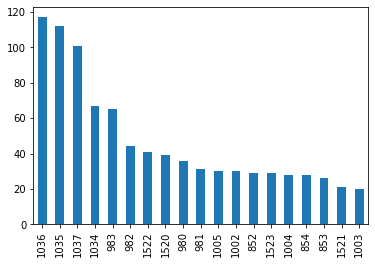

In [69]:
#criando gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

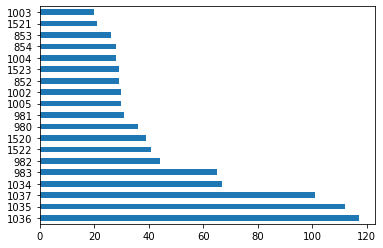

In [70]:
#criando grpafico de barras horizontais
df['LojaID'].value_counts(ascending=False).plot.barh()

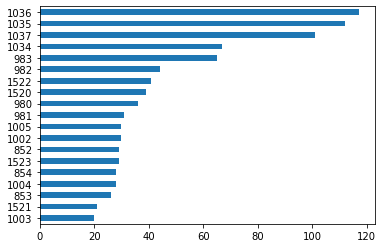

In [72]:
# gráfico de barras maior para o menor
df['LojaID'].value_counts(ascending=True).plot.barh();

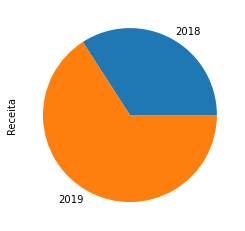

In [74]:
#gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [75]:
#total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

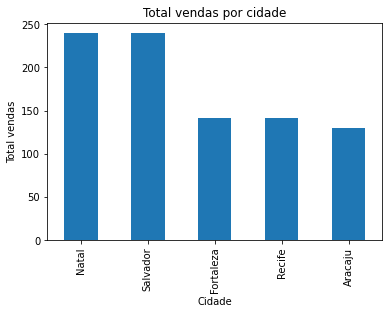

In [78]:
#adicionando titulo para o grafico e nome para os eixos
df['Cidade'].value_counts().plot.bar(title="Total vendas por cidade")
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

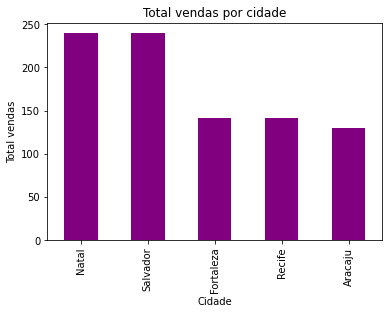

In [81]:
#alterando a cor
df['Cidade'].value_counts().plot.bar(title="Total vendas por cidade", color='purple')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [82]:
#alterando o estilo
plt.style.use('ggplot')

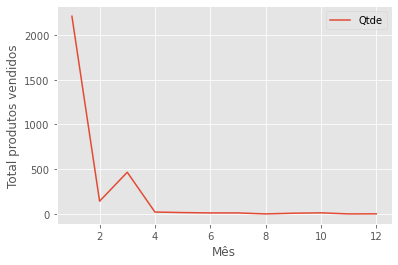

In [86]:
df.groupby(df['Mês_venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

In [89]:
#selecionando apenas vendas de 2019
df_2019 = df[df['Ano_venda'] == 2019]

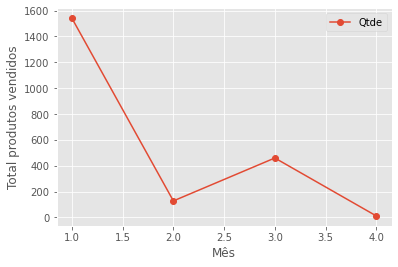

In [95]:
#plot do grafico de vendas mensais de 2019
df_2019.groupby(df_2019['Mês_venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend()

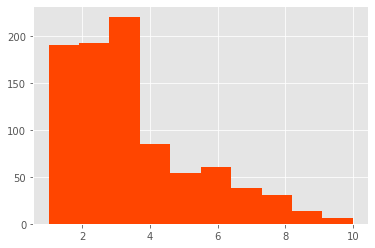

In [99]:
#histograma
plt.hist(df['Qtde'], color='orangered');

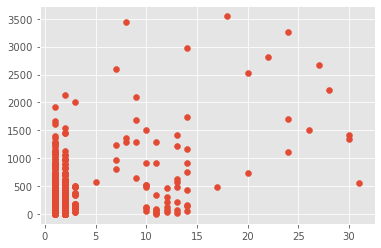

In [102]:
#gráfico de dispersão
plt.scatter(x=df_2019['Dia_venda'], y=df_2019['Receita']);